In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [132]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [133]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
train_df=np.array(train_df)
test_df=np.array(test_df)
m,n=train_df.shape
print(f"{m}x{n}")
np.random.shuffle(train_df)
np.random.shuffle(test_df)

42000x785


In [136]:
test_df=test_df.T
X_test=test_df
X_test=X_test/255.

In [137]:
train_df=train_df.T
X_train=train_df[1:n]
Y_train=train_df[0]
X_train=X_train/255.

In [138]:

print(f"Y_train: {(Y_train.shape)}")
print(f"X_train: {(X_train.shape)}")
print(f"X_test: {(X_test.shape)}")

Y_train: (42000,)
X_train: (784, 42000)
X_test: (784, 28000)


In [139]:
Y_train

array([8, 8, 5, ..., 4, 4, 6], dtype=int64)

In [140]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
def params():
    w1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2

In [142]:
def Rectified_Linear_Unit(z):
    return np.maximum(z,0)
    
def softmax(z):
    Z= np.exp(z)/sum(np.exp(z))
    return Z

In [143]:
def forward_prop(w1,b1,w2,b2,x):
    z1=(w1.dot(x))+b1
    a1=Rectified_Linear_Unit(z1)
    z2=(w2.dot(a1))+b2
    a2=softmax(z2)
    return z1,a1,z2,a2

In [144]:
def derivative_RLU(z):
    return z>0

In [145]:
def one_hot_encoding(y):
    one_hot_y=np.zeros((y.size,y.max()+1))
    one_hot_y[np.arange(y.size),y]=1
    one_hot_y=one_hot_y.T
    return one_hot_y

In [146]:
def back_prop(z1,a1,z2,a2,w1,w2,x,y):
    one_hot_y=one_hot_encoding(y)
    dz2=a2-one_hot_y
    dw2=1/m*dz2.dot(a1.T)
    db2=1/m*np.sum(dz2)
    dz1=w2.T.dot(dz2)*derivative_RLU(z1)
    dw1=1/m*dz1.dot(x.T)
    db1=1/m*np.sum(dz1)
    return dw1,db1,dw2,db2

In [147]:
def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2

In [148]:
def predictions(a2):
    return np.argmax(a2,0)

def accuracy(predictions,y):
    print(predictions,y)
    return np.sum(predictions == y)/y.size

In [149]:
def gradient_descent(x,y,iterations,alpha):
    w1,b1,w2,b2=params()

    for i in range(iterations):
        z1,a1,z2,a2=forward_prop(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2=back_prop(z1,a1,z2,a2,w1,w2,x,y)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)

        if (i%10==0):
            predicted=predictions(a2)
            print(f"Iteration: {i},\nAccuracy: {accuracy(predicted,y)}\n")
    
    return w1,b1,w2,b2


In [ ]:
w1,b1,w2,b2=gradient_descent(X_train,Y_train,2000,0.10)

[0 3 0 ... 5 0 0] [8 8 5 ... 4 4 6]
Iteration: 0,
Accuracy: 0.06138095238095238

[5 1 5 ... 5 1 0] [8 8 5 ... 4 4 6]
Iteration: 10,
Accuracy: 0.17883333333333334



KeyboardInterrupt: 

In [ ]:
def make_predictions(x,w1,b1,w2,b2):
    z1,a1,z2,a2=forward_prop(w1,b1,w2,b2,x)
    predicted_op=predictions(a2)
    return predicted_op

def test(index,w1,b1,w2,b2):
    img=X_test[:,index,None]
    predicted_op = make_predictions(X_test[:,index,None], w1, b1, w2, b2)
    print("Prediction:", predicted_op)
    
    img = img.reshape((28,28))*255
    plt.gray()
    plt.imshow(img,interpolation='nearest')
    plt.show()

Prediction: [8]


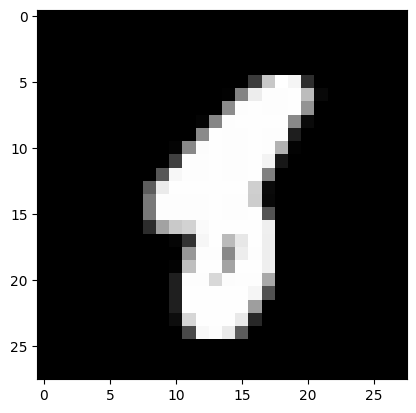

Prediction: [7]


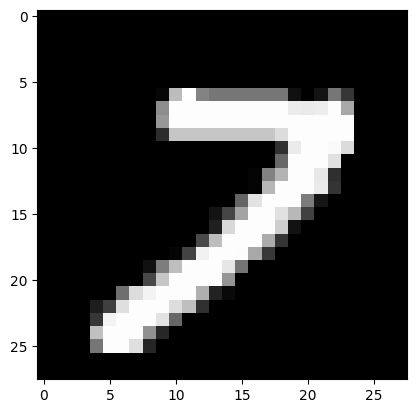

Prediction: [3]


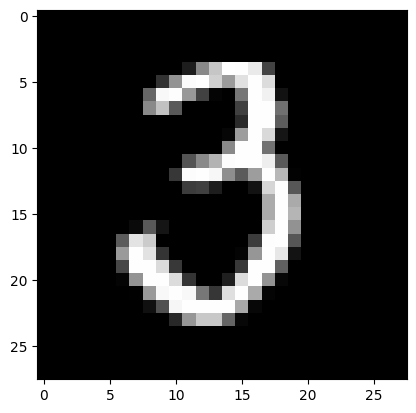

Prediction: [7]


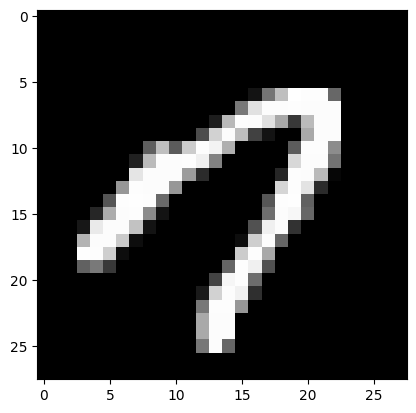

In [153]:
test(24, w1, b1, w2, b2)
test(9, w1, b1, w2, b2)
test(34, w1, b1, w2, b2)
test(87, w1, b1, w2, b2)